<a href="https://colab.research.google.com/github/kundana12345/DataScience/blob/main/KundAddaU5proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


abalone
data: https://archive.ics.uci.edu/dataset/1/abalone

- only using females


#Introduction
In this project, we'll be looking into the relationship between abalone shell weight and the weight of the whole abalone. Specifically, we'll be using abalone's shell weight to predict the whole abalone weight. Abalones are large marine snails.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
import graphviz as gv

from scipy.interpolate import PchipInterpolator


In [3]:
url_bikes = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/bikes.csv'

In [4]:

#load the data into a pandas dataframe, and print it
url_abalones = 'https://raw.githubusercontent.com/kundana12345/DataScience/refs/heads/main/abaloneData.csv'
#I could have put the url string directly into pd.read_csv()
abalones = pd.read_csv(url_abalones)

In [5]:
abalones

,shell weight,whole weight
0,0.1500,0.5140
1,0.0700,0.2255
2,0.2100,0.6770
3,0.1550,0.5160
4,0.0550,0.2050
...,...,...
4172,0.2490,0.8870
4173,0.2605,0.9660
4174,0.3080,1.1760
4175,0.2960,1.0945


<Axes: xlabel='shell weight', ylabel='whole weight'>

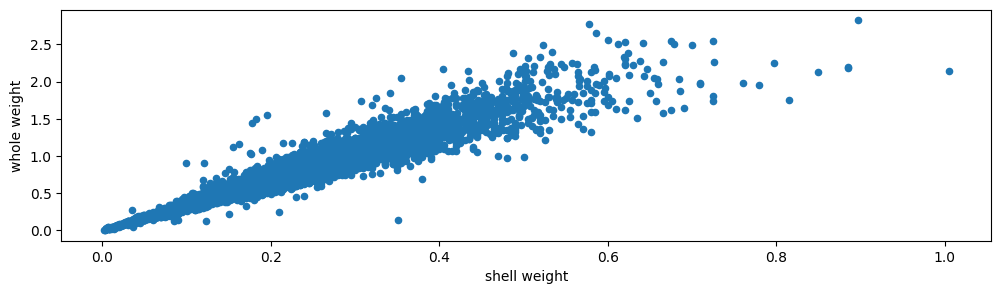

In [6]:
abalones.plot(x="shell weight", y="whole weight", figsize=(12, 3), kind="scatter")

This scatter plot shows us that there is a linear relationship between shell weight and whole weight. This makes sense, because on of the factors of shell weight is how big the abalone is, which also has a positive correlation with whole weight.
Its interesting how as we get more to the top right of the graph, the data points seem to be more dispersed. This means that the relationship is less strong as the weight of the abalone increases.

In [ ]:
#la stands for linear abalone
with pm.Model() as model_la:

    #priors for the linear part of our model
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)

    #this is the linear part of our model
    μ = pm.Deterministic("μ", α + β * abalones['shell weight'])

    #prior for the standard deviation of our likelihood
    #Cauchy is a T dist with nu = 1
    σ = pm.HalfCauchy("σ", 10)

    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=abalones['whole weight'])

    #inference data object
    idata_la = pm.sample()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

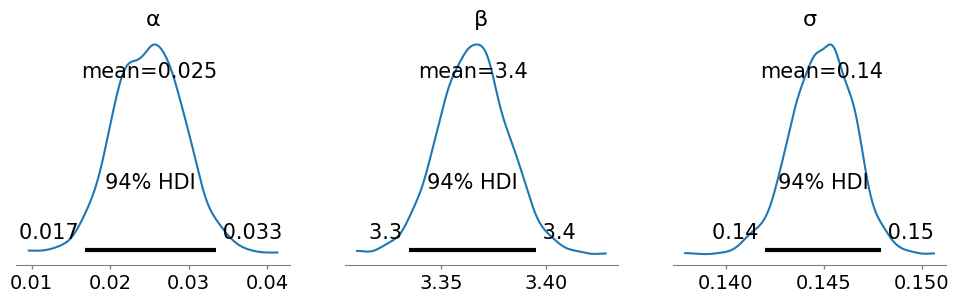

In [8]:
az.plot_posterior(idata_la, var_names=["~μ"], figsize=(12, 3))

Text(0, 0.5, 'whole weight')

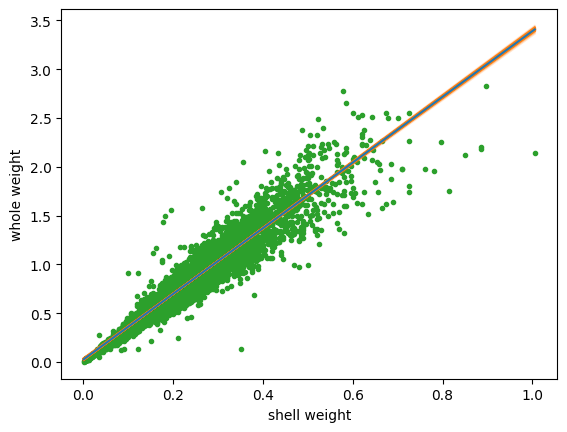

In [10]:
#grabs 100 posterior samples
posterior = az.extract(idata_la, num_samples=100)

# grabbing x values for graphing.
x_plot = xr.DataArray(
    np.linspace(abalones['shell weight'].min(), abalones['shell weight'].max(), 50),
    dims="plot_id"
    )

# this creates the expected line, the path we predict temperature and
#rented bike count deviates from
mean_line = posterior["α"].mean() + posterior["β"].mean() * x_plot

#These are a 50 lines that our model came up with
lines = posterior["α"] + posterior["β"] * x_plot

#set up plot
_, ax = plt.subplots()

#plots 50 other lines our model came up with.
ax.plot(x_plot, lines.T, c="C1", alpha=0.2, label="lines")

#plots the mean line
ax.plot(x_plot, mean_line, c="C0", label="mean line")

#plot the raw data
ax.plot(abalones['shell weight'], abalones['whole weight'], "C2.", zorder=-3)

#label axes and create legend
ax.set_xlabel("shell weight")
ax.set_ylabel("whole weight")

In [ ]:
# posterior predictive check
pm.sample_posterior_predictive(idata_la, model=model_la,  extend_inferencedata=True)

Text(0, 0.5, 'whole weight')

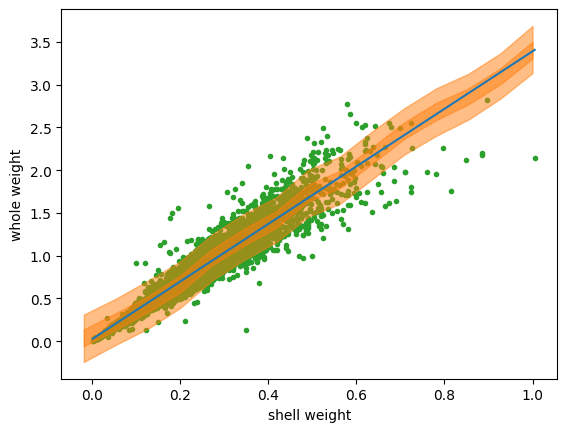

In [12]:
#plots the posterior predictive distribution

# grabs the expected line, or line of best fit formula
# We'll calculate a smooth mean line for visualization, similar to BobDXXXwx-Bm
alpha_mean = idata_la.posterior["α"].mean().item()
beta_mean = idata_la.posterior["β"].mean().item()
x_plot_smooth = np.linspace(abalones['shell weight'].min(), abalones['shell weight'].max(), 100)
mean_line_smooth = alpha_mean + beta_mean * x_plot_smooth

# creates some x values to run through our line formula
# Corrected column access for abalones
abaloness = np.random.normal(abalones['shell weight'].values, 0.01)
idx = np.argsort(abaloness)
x = np.linspace(abaloness.min(), abaloness.max(), 15)

# grabs the 94% HDI and 50% HDI
# Corrected idata_la to idata_lb
y_pred_q = idata_la.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
# sets up the HDIs for graphing
y_hat_bounds = iter(
    [
        PchipInterpolator(abaloness[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

# plots raw data and our line of best fit
_, ax = plt.subplots()
# Corrected plotting of raw data to use original DataFrame columns
ax.plot(abalones['shell weight'], abalones['whole weight'], "C2.", zorder=-3)
# Plot the smooth mean line
ax.plot(x_plot_smooth, mean_line_smooth, c="C0")


# graphs the 94% and 50% HDIs
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

# labels
ax.set_xlabel("shell weight")
ax.set_ylabel("whole weight")

This is the posterior predictive distribution. The orange lines represent how the model thinks our data looks.
There seems to be a slight change because of the outliers in the top right.

<Axes: xlabel='y_pred'>

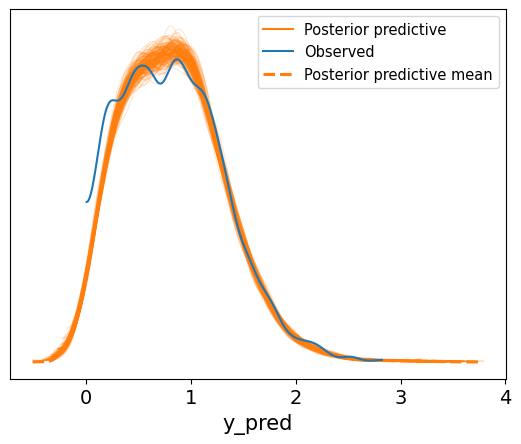

In [13]:
#posterior predictive check
az.plot_ppc(idata_la, num_pp_samples=200, colors=["C1", "C0", "C1"])

#Conclusion
It turns out that the relationship is linear and that my model was able to predict a lot of the data. I think it missed a lot of the values (and how they change) in the 0-2 range for the whole weight, which is interesting, since most of the values are in that range.